# Binary text classification using a *Bag of Words*
Author: **[Carl McBride Ellis](https://u-tad.com/claustro/carl-mcbride-ellis/)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## read in the corpus of text data

In [2]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html
from sklearn.datasets import fetch_20newsgroups

# list all 20 categories
fetch_20newsgroups(subset='train').target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Here we select just two of the news groups and perform binary classification

In [3]:
categories = [
    "talk.politics.misc",
    "talk.religion.misc",
]

In [4]:
dataset = fetch_20newsgroups(subset='all',
                             categories = categories,
                             shuffle = True,
                             random_state = 42,
                             remove=("headers", "footers", "quotes"),
                             return_X_y = False
                            )

In [5]:
X, y = dataset.data, dataset.target

How many documents do we have?

In [6]:
len(X)

1403

Take a look at the first three of the documents

In [7]:
X[0]

'\n\n      Perhaps I failed to make myself clear:  Minorities in the U.S.\n*correlate* with poverty.  This isn\'t good and we should address it,\nbut we shouldnt\' ignore that minorities and poverty *do* tend to go\ntogether.\n\n      *Does* Vancouver have a consistantly poor population drawn along\nracial lines?  If it doesn\'t, then assumptions of being able to compare\nminority vs. majority in both cities is questionable at best.\n\n\n       If the *rate* of increase over a period of several years remains\nunchanged, or increases, I think it\'s not a far jump to say that the laws\nare not effective.  No, you can\'t sit down and say that things wouldn\'t\nhave been worse.  I don\'t have a crystal ball and neither do you.  However,\nthat road leads us to a place where it is impossible to critique *any*\naction.  If it gets down to be, "It might have been worse without them,"\nthen there *is* no valid objection, which I\'m sure would amuse certain\npeople to no end.\n\n\n       So we\'

In [8]:
X[1]

"Can people please stop the 'I think/know the BATF/FBI are completely\nresponsible but they'll cover it up so that the investigation will\nshow that Koresch is responsible' bs. In an investigation of this\nsize with the feds, state, and civilians involved in the\ninvestigation it would be practially impossible to cover up.\nAnd with Republicans like Arlen Spector calling for investigations,\nthis isn't going to be handled with kid gloves."

In [9]:
X[2]

"So we have this highly Christian religious order that put fire\non their house, killing most of the people inside.\n\nI'm not that annoyed about the adults, they knew supposedly what\nthey were doing, and it's their own actions.\n\nWhat I mostly are angry about is the fact that the people inside,\nincluding mothers, let the children suffer and die during awful\nconditions.\n\nIf this is considered religious following to the end, I'm proud\nthat I don't follow such fanatical and non-compassionate religions.\n\nYou might want to die for whatever purpose, but please spare\nthe innocent young ones that has nothing to do with this all.\n\nI have a hard time just now understanding that Christianity\nknows about the word compassion. Christians, do you think \nthe actions today would produce a good picture of your \nreligion?\n\n\nKent\n"

## Tokenize then vectorize the data
Here we use the Scikit-learn [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) (also try out the [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)).

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words=None)

# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words=None)

In [11]:
X = vectorizer.fit_transform(X)

In [12]:
X.shape

(1403, 19765)

We see we now have over 20,000 features!

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## our classifier
Here we shall use [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from Scikit-learn as our classifier

In [14]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

## fit and predict

In [15]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## Results

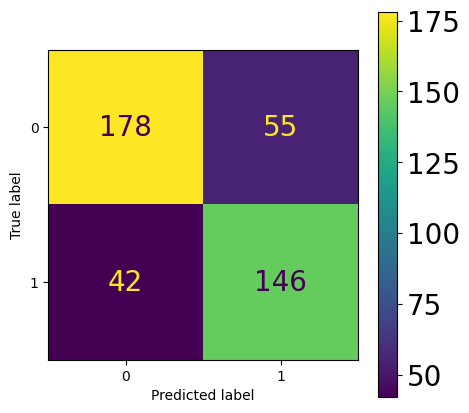

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

# plot
fig, ax = plt.subplots(figsize=(5,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.rcParams.update({'font.size': 20})
disp.plot(ax=ax);

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7695961995249406

In [18]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

np.float64(0.5379956472685623)

# Task: complete this table with the metrics

| vectorizer | ngram_range | stop_words | accuracy_score | matthews_corrcoef |
| --- | --- | --- | --- | --- |
| CountVectorizer  | (1, 1) | None | | |
| CountVectorizer  | (1, 2) | None | | |
| CountVectorizer  | (1, 3) | None | | |
| CountVectorizer  | (2, 2) | None | | |
| CountVectorizer  | (2, 3) | None | | |
| CountVectorizer  | (3, 3) | None | | |
| CountVectorizer  | (1, 1) | `"english"` | | |
| CountVectorizer  | (1, 2) | `"english"` | | |
| CountVectorizer  | (1, 3) | `"english"` | | |
| CountVectorizer  | (2, 2) | `"english"` | | |
| CountVectorizer  | (2, 3) | `"english"` | | |
| CountVectorizer  | (3, 3) | `"english"` | | |
| TfidfVectorizer  | (1, 1) | None | | |
| TfidfVectorizer  | (1, 2) | None | | |
| TfidfVectorizer  | (1, 3) | None | | |
| TfidfVectorizer  | (2, 2) | None | | |
| TfidfVectorizer  | (2, 3) | None | |
| TfidfVectorizer  | (3, 3) | None | | |
| TfidfVectorizer  | (1, 1) | `"english"` | | |
| TfidfVectorizer  | (1, 2) | `"english"` | | |
| TfidfVectorizer  | (1, 3) | `"english"` | | |
| TfidfVectorizer  | (2, 2) | `"english"` | | |
| TfidfVectorizer  | (2, 3) | `"english"` | | |
| TfidfVectorizer  | (3, 3) | `"english"` | | |